Monitorear el entrenamiento con tensorboard (tensorboard --logdir=runs) en el directorio.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from torch.utils.tensorboard import SummaryWriter

os.environ['KMP_DUPLICATE_LIB_OK']='True'

torch.cuda.empty_cache()

In [2]:
# Definir la arquitectura de la CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # Primera capa de convolución
        self.conv1_bn = nn.BatchNorm2d(32) # Capa de normalización de lote luego de cada capa de convolución
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # Segunda capa de convolución
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_bn(self.conv2(x))))
        x = self.pool(F.relu(self.conv3_bn(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Files already downloaded and verified
Files already downloaded and verified
No checkpoint found, starting from scratch.
[1,   100] loss: 2.045
[1,   200] loss: 0.913
[1,   300] loss: 0.580
[1,   400] loss: 0.424
[1,   500] loss: 0.335
[1,   600] loss: 0.274
[1,   700] loss: 0.237
[1,   800] loss: 0.198
[1,   900] loss: 0.177
[1,  1000] loss: 0.155
[1,  1100] loss: 0.139
[1,  1200] loss: 0.122
[1,  1250] loss: 0.059
Validation loss: 0.045, Validation accuracy: 0.485
[2,   100] loss: 1.457
[2,   200] loss: 0.709
[2,   300] loss: 0.475
[2,   400] loss: 0.347
[2,   500] loss: 0.268
[2,   600] loss: 0.227
[2,   700] loss: 0.194
[2,   800] loss: 0.165
[2,   900] loss: 0.141
[2,  1000] loss: 0.125
[2,  1100] loss: 0.113
[2,  1200] loss: 0.101
[2,  1250] loss: 0.049
Validation loss: 0.040, Validation accuracy: 0.541
[3,   100] loss: 1.191
[3,   200] loss: 0.581
[3,   300] loss: 0.386
[3,   400] loss: 0.283
[3,   500] loss: 0.228
[3,   600] loss: 0.191
[3,   700] loss: 0.160
[3,   800] loss: 0.

[23,   800] loss: 0.073
[23,   900] loss: 0.061
[23,  1000] loss: 0.060
[23,  1100] loss: 0.053
[23,  1200] loss: 0.047
[23,  1250] loss: 0.024
Validation loss: 0.020, Validation accuracy: 0.782
[24,   100] loss: 0.542
[24,   200] loss: 0.272
[24,   300] loss: 0.195
[24,   400] loss: 0.140
[24,   500] loss: 0.114
[24,   600] loss: 0.091
[24,   700] loss: 0.085
[24,   800] loss: 0.068
[24,   900] loss: 0.063
[24,  1000] loss: 0.058
[24,  1100] loss: 0.051
[24,  1200] loss: 0.048
[24,  1250] loss: 0.024
Validation loss: 0.020, Validation accuracy: 0.785
[25,   100] loss: 0.547
[25,   200] loss: 0.278
[25,   300] loss: 0.184
[25,   400] loss: 0.138
[25,   500] loss: 0.108
[25,   600] loss: 0.090
[25,   700] loss: 0.084
[25,   800] loss: 0.064
[25,   900] loss: 0.063
[25,  1000] loss: 0.057
[25,  1100] loss: 0.051
[25,  1200] loss: 0.048
[25,  1250] loss: 0.022
Validation loss: 0.021, Validation accuracy: 0.773
[26,   100] loss: 0.554
[26,   200] loss: 0.268
[26,   300] loss: 0.191
[26,   

[46,   100] loss: 0.460
[46,   200] loss: 0.225
[46,   300] loss: 0.150
[46,   400] loss: 0.111
[46,   500] loss: 0.095
[46,   600] loss: 0.073
[46,   700] loss: 0.068
[46,   800] loss: 0.055
[46,   900] loss: 0.048
[46,  1000] loss: 0.047
[46,  1100] loss: 0.040
[46,  1200] loss: 0.038
[46,  1250] loss: 0.017
Validation loss: 0.019, Validation accuracy: 0.803
[47,   100] loss: 0.436
[47,   200] loss: 0.230
[47,   300] loss: 0.136
[47,   400] loss: 0.116
[47,   500] loss: 0.088
[47,   600] loss: 0.077
[47,   700] loss: 0.066
[47,   800] loss: 0.058
[47,   900] loss: 0.052
[47,  1000] loss: 0.045
[47,  1100] loss: 0.039
[47,  1200] loss: 0.040
[47,  1250] loss: 0.019
Validation loss: 0.019, Validation accuracy: 0.802
[48,   100] loss: 0.420
[48,   200] loss: 0.233
[48,   300] loss: 0.157
[48,   400] loss: 0.117
[48,   500] loss: 0.084
[48,   600] loss: 0.075
[48,   700] loss: 0.061
[48,   800] loss: 0.058
[48,   900] loss: 0.049
[48,  1000] loss: 0.045
[48,  1100] loss: 0.042
[48,  1200

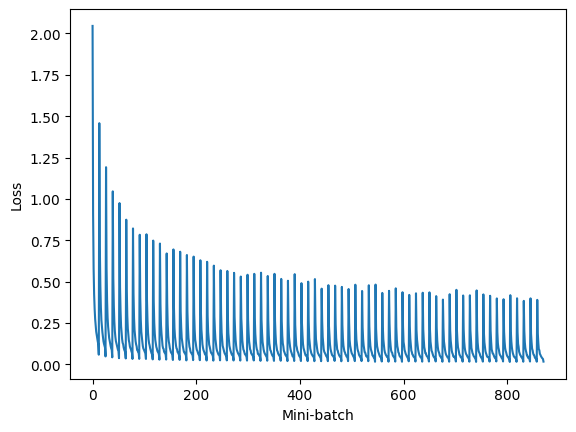

Accuracy of the network on the 10000 test images: 80 %


In [3]:
def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Inicializar el escritor de TensorBoard
    writer = SummaryWriter('runs/experiment_1')
    # Cargar y normalizar los conjuntos de datos CIFAR10

    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # Aumento de datos con flip
        transforms.RandomCrop(32, padding=4),  # Aumento de datos con crop
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)

    train_size = int(0.8 * len(full_trainset))
    test_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, test_size])

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            shuffle=True, num_workers=4)
    valloader = torch.utils.data.DataLoader(valset, batch_size=32,
                                            shuffle=True, num_workers=4)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                            shuffle=False, num_workers=4)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # Crear la red
    net = Net()
    # Mover el modelo a la GPU
    net.to(device)
    
    # Definir la función de pérdida y el optimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

    # Cargar el último checkpoint si existe
    start_epoch = 0
    if os.path.exists('checkpoints/latest_checkpoint.pth'):
        checkpoint = torch.load('checkpoints/latest_checkpoint.pth')
        net.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        print(f'Loaded checkpoint from epoch {start_epoch}')
    else:
        print("No checkpoint found, starting from scratch.")

    # Entrenar la red y guardar las pérdidas para la visualización
    train_losses = []
    val_losses = []
    best_val_loss = float("inf")
    epochs_no_improve = 0
    n_epochs_stop = 15

    for epoch in range(start_epoch,20000):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            # move the inputs and labels to GPU
            inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 100 == 99 or i == len(trainloader) - 1:  # Asume que la indexación comienza en 0
                avg_loss = running_loss / (i+1)
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, avg_loss))
                train_losses.append(avg_loss)
                writer.add_scalar('training loss', avg_loss, epoch * len(trainloader) + i)
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in valloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        avg_val_loss = val_loss / total
        val_accuracy = correct / total
        print(f'Validation loss: {avg_val_loss:.3f}, Validation accuracy: {val_accuracy:.3f}')
        val_losses.append(avg_val_loss)
        
        if epoch % 10 == 9:
            torch.save({
                'epoch': epoch,
                'model_state_dict': net.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss
            }, f'checkpoints/checkpoint{epoch}.pth')
            print(f'Saved checkpoint at epoch {epoch}')

        # Guardar el último checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
        }, 'checkpoints/latest_checkpoint.pth')
        
        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(net.state_dict(), 'model.pth')
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == n_epochs_stop:
                print('Early stopping!')
                # Load the best state dict
                net.load_state_dict(torch.load('model.pth'))
                # Exit the loop
                break

    print('Finished Training')
    writer.close()

    import matplotlib.pyplot as plt

    # Visualizar la pérdida durante el entrenamiento
    plt.plot(train_losses)
    plt.xlabel('Mini-batch')
    plt.ylabel('Loss')
    plt.show()

    # Evaluación del modelo en el conjunto de datos de prueba
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

    # Guardar el modelo entrenado
    torch.save(net.state_dict(), 'model.pth')


if __name__ == "__main__":
    main()

In [4]:
# Cargar el modelo entrenado
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.load_state_dict(torch.load('model.pth'))
net.to(device)
net.eval()  # poner el modelo en modo de evaluación

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [5]:
# Cargar y normalizar el conjunto de datos de prueba CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [7]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

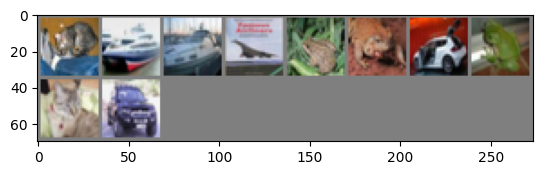

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car


In [8]:
# Obtener algunas imágenes de prueba aleatorias
images, labels = next(iter(testloader))

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))
# Imprimir etiquetas verdaderas
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
images, labels = images.to(device), labels.to(device)
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))